<a href="https://colab.research.google.com/github/Anson422/Anson-Eva-Valerie/blob/main/Stacked%20Bar%20Chart/EU_import_RUvsU_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Anson422/Anson-Eva-Valerie.git #clone the repository to the local machine
!git install pandas


Cloning into 'Anson-Eva-Valerie'...
remote: Enumerating objects: 5433, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 5433 (delta 175), reused 58 (delta 58), pack-reused 5205 (from 2)
Receiving objects: 100% (5433/5433), 9.01 GiB | 32.61 MiB/s, done.
Resolving deltas: 100% (1853/1853), done.
Updating files: 100% (2887/2887), done.
git: 'install' is not a git command. See 'git --help'.

The most similar command is
	instaweb


In [2]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/quarterly_data 2024-10-03.xlsx")
df

,dates,Nord Stream,"Yamal (BY,PL)",Ukraine Gas Transit,Turkstream,Russia LNG,Russia,USA LNG,LNG less RU and USA,Norway,Algeria,UK,Azerbaijan,Libya
0,2021-03-31,15358.767633,9800.212527,9800.280924,2842.923903,3313.297135,41115.482123,4046.636956,9300.056200,20016.236610,10073.115669,1640.847652,1326.611411,914.029684
1,2021-06-30,15404.674290,9781.775321,10904.784728,2800.350375,4185.431649,43077.016363,7033.273347,10853.634810,19927.103754,9847.151268,1402.433750,2079.985046,772.946864
2,2021-09-30,13814.394331,7927.087842,9407.804200,3257.031165,1922.080024,36328.397561,3931.964138,8971.878168,23004.089289,8230.817689,1978.071210,2594.189696,827.956261
3,2021-12-31,15685.689929,3716.347772,9609.176896,3679.606779,3876.769107,36567.590483,5945.372823,10541.285255,23266.633750,8716.940050,3428.207872,2783.979061,801.294797
4,2022-03-31,14676.298610,2024.019694,6213.326652,3524.772532,5116.737828,31555.155315,14133.949131,10552.002362,23354.623895,8569.391952,3484.789383,2743.560731,512.836852
5,2022-06-30,13564.978276,649.777925,5339.892162,2434.798312,4668.580849,26658.027524,14897.026108,12234.781392,23893.976070,8361.206227,8164.030149,3107.038894,708.949297
6,2022-09-30,2264.982423,0.000000,3535.431775,3842.804850,4199.586221,13842.805269,13175.581999,14339.647314,23676.756738,8525.155166,8162.558954,3098.151523,593.110975
7,2022-12-31,0.000000,0.000000,3694.221499,3147.891807,4566.856133,11408.969439,12624.027920,17305.222743,23426.364254,8730.887417,6400.859889,3307.228577,873.443851
8,2023-03-31,0.000000,0.000000,2837.449532,2637.472494,5036.417725,10511.339751,14101.048245,13170.213642,23476.150905,7318.667675,4850.591245,3096.441891,691.302876
9,2023-06-30,0.000000,0.000000,3267.948682,2588.875575,4601.492368,10458.316626,16794.255840,14550.795481,22424.073815,8509.097454,6484.323957,3037.083973,722.073983


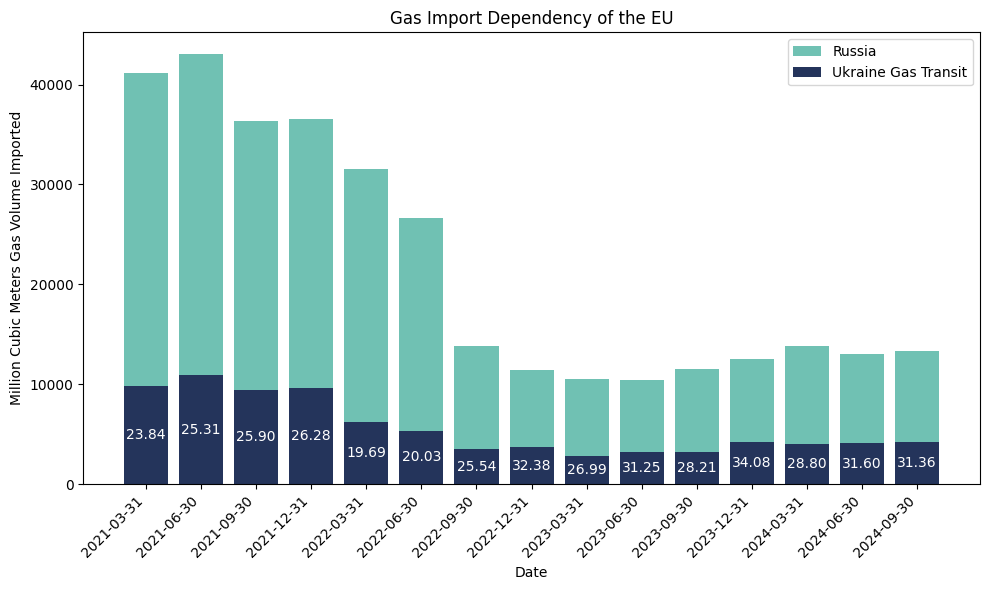

In [5]:
df['dates'] = pd.to_datetime(df['dates']).dt.strftime('%Y-%m-%d')

# set size,style
plt.figure(figsize=(10, 6))

# draw bar chart
plt.bar(df['dates'], df['Russia'], color='#70C1B3',label='Russia')
plt.bar(df['dates'], df['Ukraine Gas Transit'], color='#24345B',label='Ukraine Gas Transit')
df['Proportion'] = (df['Ukraine Gas Transit'] / df['Russia'])*100
# add titles
plt.xlabel('Date')
plt.ylabel('Million Cubic Meters Gas Volume Imported')
plt.title('Gas Import Dependency of the EU')
plt.legend()

# 45 degree rotate for nice to read
plt.xticks(rotation=45, ha='right')

for i, row in df.iterrows():
    plt.text(i, row['Ukraine Gas Transit'] / 2, f"{row['Proportion']:.2f}", ha='center', va='center', color='white')


# show the chart
plt.tight_layout()
plt.show()

Figure 1 :Comparison of Ukrainian transit and Russian gas expansion into Europe(McWilliams, B., G. Sgaravatti, G. Zachmann ,2021))